In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

from wordcloud import WordCloud
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import pickle

import warnings
warnings.filterwarnings('ignore')


# DATA COLLECTION



In [3]:
# Load the dataset as a Pandas DataFrame
df = pd.read_csv("/content/spam (1).csv",encoding="latin-1")

# Check the first few rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = pd.DataFrame(df)


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.shape


(5572, 5)

In [7]:
df.columns


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
df['text'] = df['v2'].astype('str') + ',' + df['Unnamed: 2'].astype('str') + ',' + df['Unnamed: 3'].astype('str') + ',' + df['Unnamed: 4'].astype('str')


In [9]:
df['text']


0       Go until jurong point, crazy.. Available only ...
1               Ok lar... Joking wif u oni...,nan,nan,nan
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568    Will Ì_ b going to esplanade fr home?,nan,nan,nan
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571               Rofl. Its true to its name,nan,nan,nan
Name: text, Length: 5572, dtype: object

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
 5   text        5572 non-null   object
dtypes: object(6)
memory usage: 261.3+ KB


In [11]:
df['v1'] = df.rename(columns={"v1": "email"}, inplace=True)
df.head()



,email,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,text,v1
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,"Go until jurong point, crazy.. Available only ...",None
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,"Ok lar... Joking wif u oni...,nan,nan,nan",None
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,Free entry in 2 a wkly comp to win FA Cup fina...,None
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,U dun say so early hor... U c already then say...,None
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,"Nah I don't think he goes to usf, he lives aro...",None


In [12]:
df.drop(columns = ['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4','v1','v2'],inplace = True)


In [13]:
df.head()


,email,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,"Ok lar... Joking wif u oni...,nan,nan,nan"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# Drop duplicates
df.drop_duplicates(inplace=True)


In [15]:
df.shape


(5169, 2)

EXPLORATORY DATA ANALYSIS



In [16]:
df['email'].value_counts()/len(df)*100


email
ham     87.366996
spam    12.633004
Name: count, dtype: float64

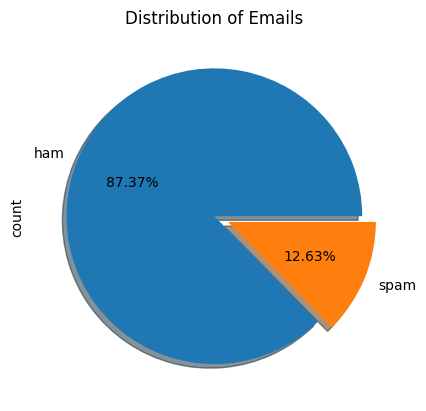

In [17]:
df['email'].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True, explode=[0,0.1])
plt.title("Distribution of Emails")
plt.show()

In [18]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
# Count number of characters
df['num_characters'] = df['text'].apply(len)

In [20]:
# Count number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [21]:
# Count number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [22]:
df.head()


,email,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",123,30,2
1,ham,"Ok lar... Joking wif u oni...,nan,nan,nan",41,14,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,167,43,2
3,ham,U dun say so early hor... U c already then say...,61,19,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",73,21,1


In [23]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
num_characters,5169.0,91.494099,58.430193,14.0,48.0,73.0,131.0,922.0
num_words,5169.0,24.355388,13.373636,7.0,15.0,21.0,32.0,226.0
num_sentences,5169.0,1.985877,1.466339,1.0,1.0,2.0,2.0,38.0


In [24]:
# ham text
df[df['email']=='ham'][['num_characters','num_words','num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,4516.0,83.013950,56.650568,14.0,46.0,65.0,104.0,922.0
num_words,4516.0,23.013508,13.543059,7.0,14.0,19.0,28.0,226.0
num_sentences,4516.0,1.841231,1.404404,1.0,1.0,1.0,2.0,38.0


In [25]:
# ham text
df[df['email']=='spam'][['num_characters','num_words','num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,653.0,150.140888,29.911860,25.0,144.0,161.0,169.0,236.0
num_words,653.0,33.635528,6.987418,8.0,31.0,35.0,38.0,52.0
num_sentences,653.0,2.986217,1.495841,1.0,2.0,3.0,4.0,9.0


In [26]:
import seaborn as sns


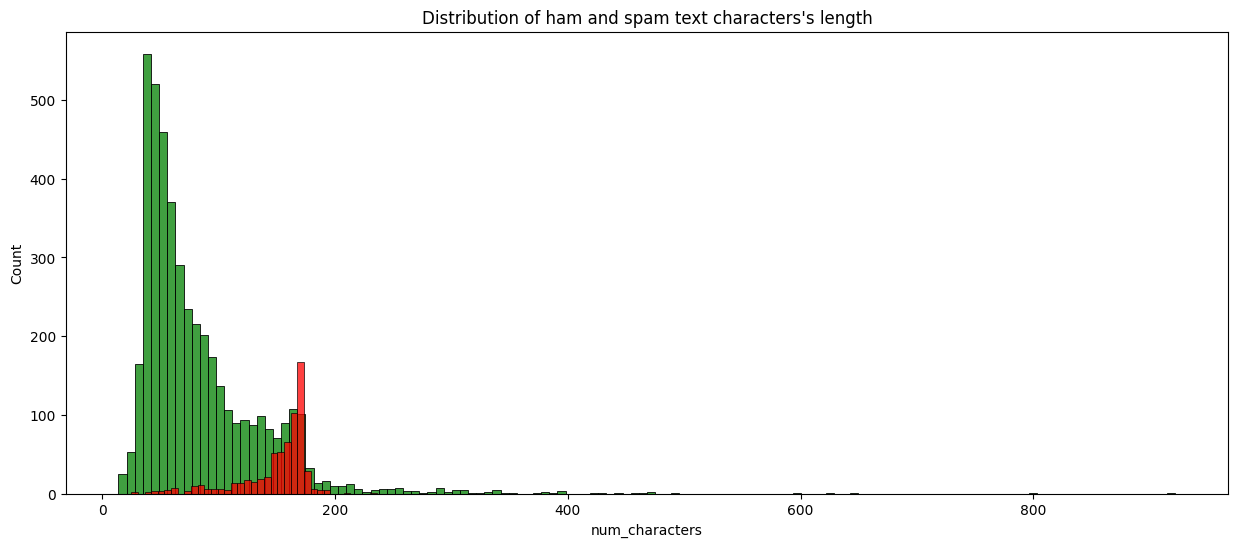

In [27]:
# Histogram for 'ham' and 'spam' text
plt.figure(figsize=(15,6))
sns.histplot(df[df['email']=='ham']['num_characters'], color = 'green')
sns.histplot(df[df['email']=='spam']['num_characters'], color='red')
plt.title("Distribution of ham and spam text characters's length")
plt.show()

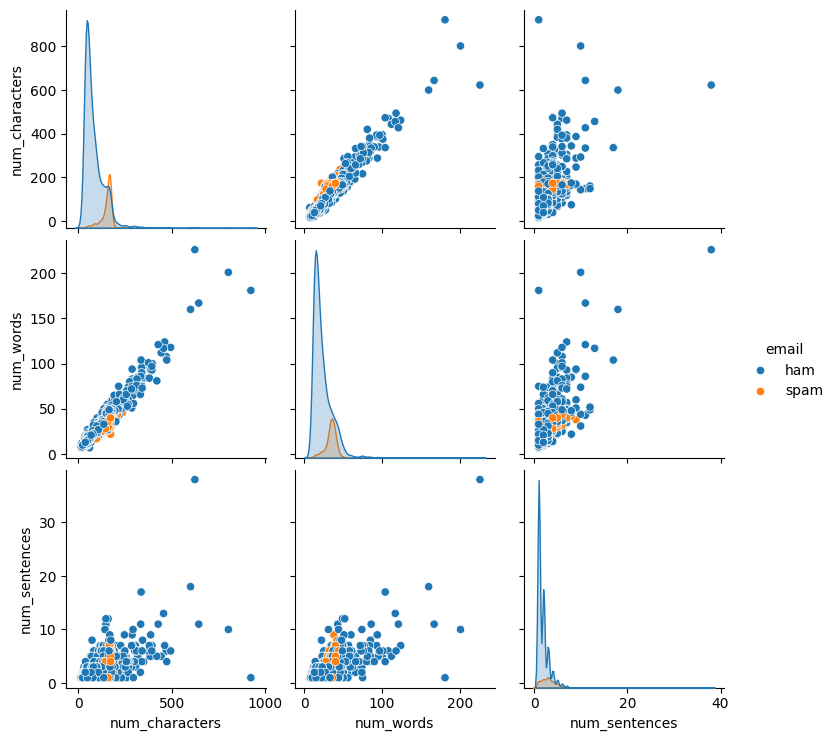

In [29]:

sns.pairplot(df, hue='email')
plt.show()


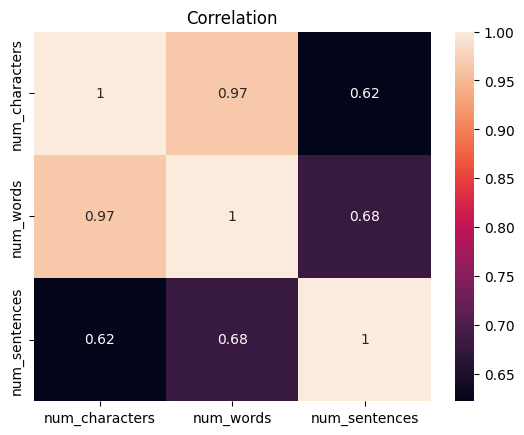

In [30]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title("Correlation")
plt.show();



In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
ps = PorterStemmer()


In [34]:
X = df.drop(columns=['text'],axis=1)
y = df['email']

In [35]:
# Function for text preprocessing
def transform_text(text):
    text = text.lower()   # Lower-case
    text = nltk.word_tokenize(text)   # Tokenize the text on  word level

    y = []
    for i in text:
        if i.isalnum():    # Check whether the text is either alpha or numeric
            y.append(i)    # If yes, append otherwise, remove special characters

    text = y[:]
    y.clear()

    for j in text:    # Removing stopwords
        if j not in stopwords.words('english') and j not in string.punctuation:
            y.append(j)

    text = y[:]
    y.clear()

    for k in  text:
        y.append(ps.stem(k))    # Convert the word to root form

    return " ".join(y)

In [36]:
df['transformed_text'] = df['text'].apply(transform_text)


In [37]:
df.head()


,email,text,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",123,30,2,go jurong point crazi avail bugi n great world...
1,ham,"Ok lar... Joking wif u oni...,nan,nan,nan",41,14,2,ok lar joke wif u oni nan nan nan
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,167,43,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,61,19,1,u dun say earli hor u c alreadi say nan nan nan
4,ham,"Nah I don't think he goes to usf, he lives aro...",73,21,1,nah think goe usf live around though nan nan nan


In [38]:
# WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [39]:
spam_wordcloud = wc.generate(df[df['email']=='spam']['transformed_text'].str.cat(sep=""))
ham_wordcloud = wc.generate(df[df['email']=='ham']['transformed_text'].str.cat(sep=""))



In [40]:
df.head()


,email,text,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",123,30,2,go jurong point crazi avail bugi n great world...
1,ham,"Ok lar... Joking wif u oni...,nan,nan,nan",41,14,2,ok lar joke wif u oni nan nan nan
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,167,43,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,61,19,1,u dun say earli hor u c alreadi say nan nan nan
4,ham,"Nah I don't think he goes to usf, he lives aro...",73,21,1,nah think goe usf live around though nan nan nan


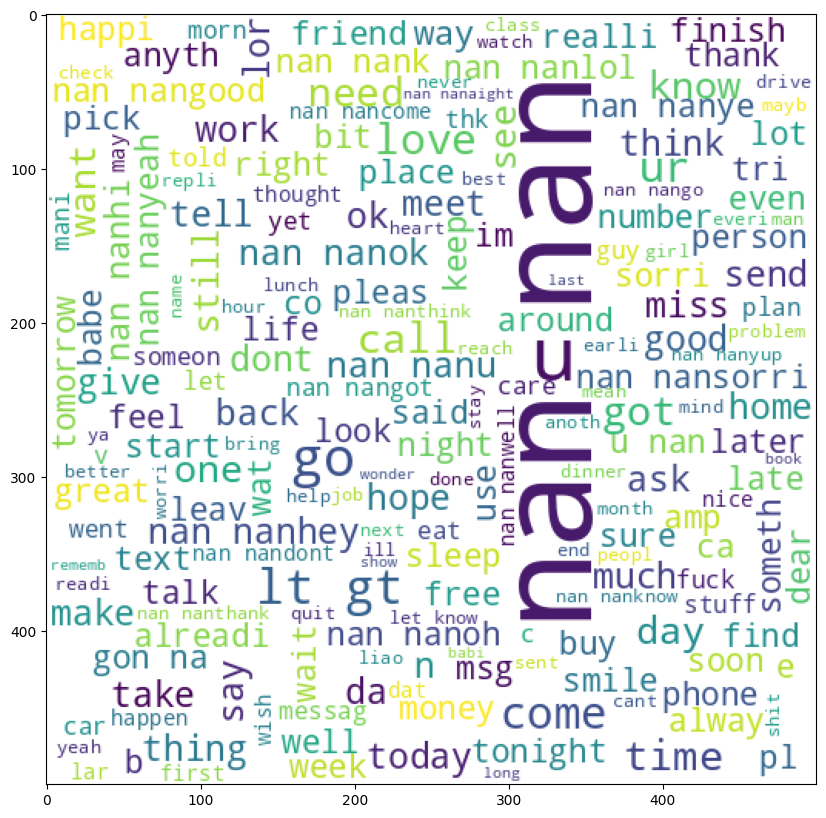

In [41]:
# Spam words
plt.figure(figsize=(15,10))
plt.imshow(spam_wordcloud)
plt.show();

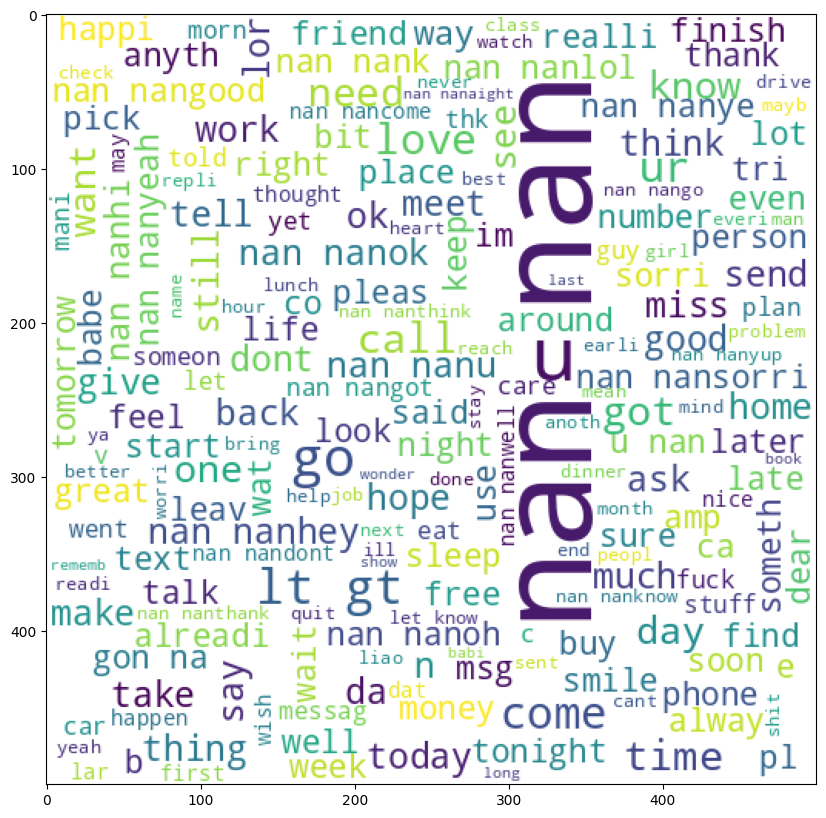

In [42]:
#ham words
plt.figure(figsize=(15,10))

plt.imshow(ham_wordcloud)
plt.show();


In [43]:

spam_corpus = []
for msg in df[df['email']=='spam']['transformed_text'].tolist():

    for word in msg.split():
        spam_corpus.append(word)

In [44]:

len(spam_corpus)

11862

In [45]:
# Top 30 words in spam text
spam_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30))
spam_common_words.head()

,0,1
0,nan,1954
1,call,319
2,free,191
3,2,155
4,txt,141


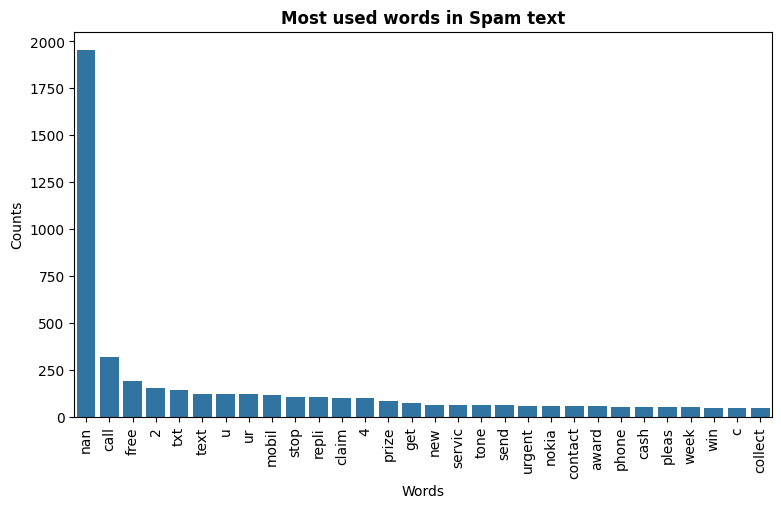

In [46]:
plt.figure(figsize=(9,5))
sns.barplot(x=spam_common_words[0], y=spam_common_words[1])
plt.xticks(rotation=90)
plt.title("Most used words in Spam text", fontweight='bold')
plt.xlabel("Words")
plt.ylabel("Counts")
plt.show()


In [47]:
ham_corpus = []
for msg in df[df['email']=='ham']['transformed_text'].tolist():

    for word in msg.split():
        ham_corpus.append(word)

In [48]:
# Top 30 words in ham text
ham_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_common_words.head()


,0,1
0,nan,13491
1,u,890
2,go,405
3,get,348
4,gt,288


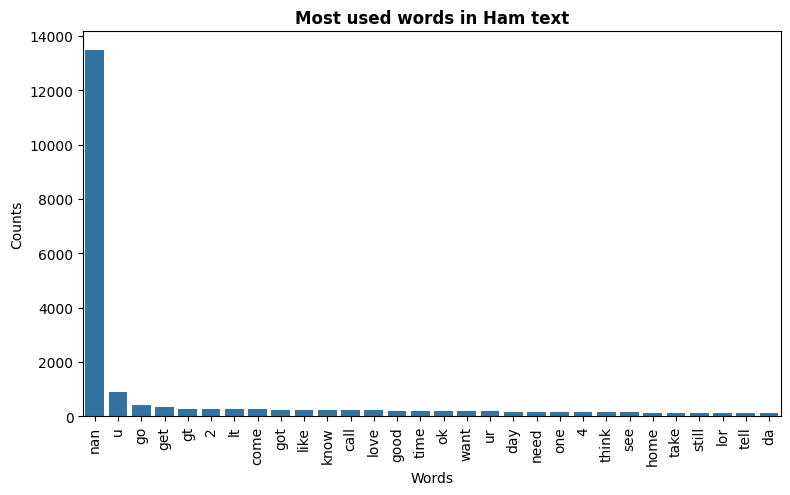

In [49]:
plt.figure(figsize=(9,5))
sns.barplot(x=ham_common_words[0], y=ham_common_words[1])
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel('Counts')
plt.title("Most used words in Ham text", fontweight='bold')
plt.show()

In [50]:
df


,email,text,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",123,30,2,go jurong point crazi avail bugi n great world...
1,ham,"Ok lar... Joking wif u oni...,nan,nan,nan",41,14,2,ok lar joke wif u oni nan nan nan
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,167,43,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,61,19,1,u dun say earli hor u c alreadi say nan nan nan
4,ham,"Nah I don't think he goes to usf, he lives aro...",73,21,1,nah think goe usf live around though nan nan nan
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,173,40,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,ham,"Will Ì_ b going to esplanade fr home?,nan,nan,nan",49,15,1,b go esplanad fr home nan nan nan
5569,ham,"Pity, * was in mood for that. So...any other s...",69,21,2,piti mood suggest nan nan nan
5570,ham,The guy did some bitching but I acted like i'd...,137,33,1,guy bitch act like interest buy someth els nex...


In [51]:
# Encode target feature
df['email'] = df['email'].map({'ham': 0, 'spam':1})
df['email'].head()

0    0
1    0
2    1
3    0
4    0
Name: email, dtype: int64

In [52]:
y = df['email'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
# CountVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [54]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
# Data partioning
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [56]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.8597678916827853
[[776 120]
 [ 25 113]]
0.48497854077253216


In [57]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [58]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9835589941972921
[[896   0]
 [ 17 121]]
1.0
